<a href="https://colab.research.google.com/github/ShaunakNandi/EIP4.0/blob/master/wk1/assignment_1_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


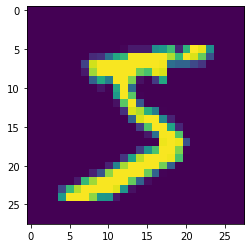

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# The Model

In [0]:
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Convolution2D(16, (3,3), activation='relu', input_shape=(28,28,1), name='input')) #o/p res:26x26 RF:3x3
model.add(BatchNormalization())
model.add(Dropout(0.1, name='drop1'))
model.add(Convolution2D(32, (3,3), activation='relu', name='layer1')) #o/p res:24x24 RF:5x5
model.add(Convolution2D(16, (1,1), activation='relu', name='trans1')) #o/p res:24x24
model.add(BatchNormalization(name='BN1'))
model.add(Dropout(0.1, name='drop2'))

model.add(MaxPooling2D(2,2, name='MP1')) #o/p res:12x12 RF:10x10

model.add(Convolution2D(16, (3,3), activation='relu', name='layer2')) #o/p res:10x10 RF:12x12
model.add(BatchNormalization(name='BN2'))
model.add(Dropout(0.1, name='drop3'))

model.add(Convolution2D(32, (3,3), activation='relu', name='layer3')) #o/p res:8x8 RF:14x14
model.add(Convolution2D(16, (1,1), activation='relu', name='trans2')) #o/p res:8x8
model.add(BatchNormalization(name='BN3'))
model.add(Dropout(0.1, name='drop4'))

model.add(MaxPooling2D(2,2, name='MP2')) #o/p res:4x4 RF:28x28

model.add(Convolution2D(16, (3,3), activation='relu', name='layer4')) #o/p res:2x2 RF:30x30
model.add(BatchNormalization(name='BN4'))
model.add(Dropout(0.3, name='drop5'))

model.add(Convolution2D(10, 1, activation='relu', name='trans3'))
model.add(Convolution2D(10, 2))
model.add(Flatten(name='unroll'))
model.add(Activation('softmax', name='output'))

# Model Summary

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Conv2D)               (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
drop1 (Dropout)              (None, 26, 26, 16)        0         
_________________________________________________________________
layer1 (Conv2D)              (None, 24, 24, 32)        4640      
_________________________________________________________________
trans1 (Conv2D)              (None, 24, 24, 16)        528       
_________________________________________________________________
BN1 (BatchNormalization)     (None, 24, 24, 16)        64        
_________________________________________________________________
drop2 (Dropout)              (None, 24, 24, 16)       

# Compile Model and run Regression

In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.




Epoch 1/10
60000/60000 [==============================] - 22s 368us/step - loss: 0.3462 - acc: 0.8970
Epoch 2/10
60000/60000 [==============================] - 19s 318us/step - loss: 0.0997 - acc: 0.9700
Epoch 3/10
60000/60000 [==============================] - 19s 317us/step - loss: 0.0773 - acc: 0.9766
Epoch 4/10
60000/60000 [==============================] - 19s 319us/step - loss: 0.0658 - acc: 0.9799
Epoch 5/10
60000/60000 [==============================] - 19s 323us/step - loss: 0.0567 - acc: 0.9822
Epoch 6/10
60000/60000 [==============================] - 19s 317us/step - loss: 0.0529 - acc: 0.9839
Epoch 7/10
60000/60000 [==============================] - 19s 317us/step - loss: 0.0482 - acc: 0.9857
Epoch 8/10
60000/60000 [==============================] - 19s 318us/step - loss: 0.0468 - acc: 0.9856
Epoch 9/10
60000/60000 [==============================] - 19s 319us/step - loss: 0.0455 - acc: 0.9860
Epoch 10/10
60000/60000 [==============================] - 19s 317us/step - loss

# Accuracy print out (0.9921)

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.02707874854534748, 0.9921]


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[4.77693085e-09 1.55891883e-06 4.69691273e-08 2.79728720e-08
  4.05838169e-10 7.78290932e-10 9.09833580e-12 9.99998212e-01
  2.37205117e-10 1.33830525e-07]
 [3.10624921e-04 3.93120834e-04 9.99220133e-01 9.08533821e-06
  1.16923247e-05 1.29842874e-06 3.33689968e-05 4.23562869e-06
  1.63895202e-05 5.41452252e-08]
 [8.31126812e-08 9.99972939e-01 5.79611935e-07 1.81187723e-08
  3.02605326e-06 1.18398752e-07 4.35337881e-08 2.03447034e-05
  2.18292507e-06 6.66091751e-07]
 [9.99970675e-01 1.29448663e-09 1.18250387e-06 2.29939001e-09
  9.11258269e-09 4.98748932e-06 1.43187190e-05 1.48108938e-07
  1.68128417e-06 7.00435612e-06]
 [1.75467605e-08 1.26453260e-05 5.28767359e-08 2.86948132e-10
  9.99914289e-01 3.19796012e-09 4.38941683e-08 1.29119712e-07
  9.66878929e-07 7.18672891e-05]
 [3.87051067e-08 9.99976039e-01 4.87621001e-08 1.64338088e-09
  8.69693122e-06 1.59979248e-08 2.01771932e-08 1.32185714e-05
  1.20180914e-06 8.79379741e-07]
 [4.86837521e-08 8.77449638e-04 1.51555912e-06 3.45972762e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

# Visualization

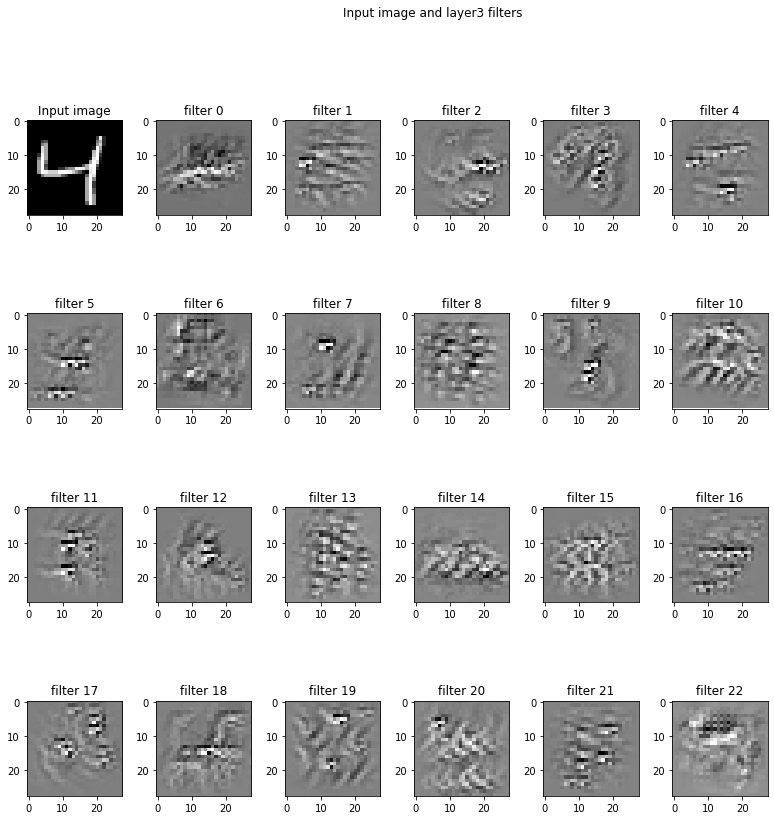

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'layer3'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()